In [1]:
import os

In [3]:
Datasets_DIR = '/home/wangyh/01-Projects/03-my/Datasets/polygons_unfilled_64_3'

In [5]:
import torch
from torch.utils.data import DataLoader, Subset
from torchvision import transforms

from my_utils import data, models
from my_utils.vis import *

# life save magic code
%load_ext autoreload
%autoreload 2

In [6]:
batch_size = 128
fig_resize = 32
T = transforms.Compose([
    transforms.ToTensor(),
    transforms.Resize((fig_resize, fig_resize))
])
loader_kwargs = {
    'batch_size': batch_size,   # default:1
    'shuffle': True,            # default:False
    'num_workers': 4,           # default:0
    'pin_memory': False,        # default:False
    'drop_last': True,          # default:False
    'prefetch_factor': 4,       # default:2
    'persistent_workers': False # default:False
}

In [7]:
train_data = data.MyDataset(Datasets_DIR + '/train', transform=T)

In [8]:
train_loader = DataLoader(train_data, batch_size=len(train_data))

In [9]:
imgs, labels = next(iter(train_loader))

In [10]:
imgs[0].max()

tensor(1.)

In [11]:
mean, std = imgs.mean(), imgs.std()
mean, std

(tensor(0.1914), tensor(0.3660))

In [47]:
train_data_norm = data.MyDataset(data_DIR + '/train', transform=transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean, std)
]))
train_loader_norm = DataLoader(train_data_norm, batch_size=len(train_data))
imgs_norm, labels_norm = next(iter(train_loader_norm))
imgs_norm.mean(), imgs_norm.std()

(tensor(-2.6989e-08), tensor(1.))

In [10]:
import matplotlib.pyplot as plt

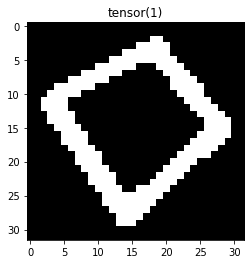

In [46]:
plt.title(labels[10000])
plt.imshow(imgs[10000].squeeze(), "gray")

In [26]:
from torchvision.io import read_image

In [32]:
img_path = data_DIR + '/train/3/3_1.png'
img = read_image(img_path)
img.size()

torch.Size([1, 32, 32])

In [53]:
imgs_norm[10000].min(), imgs_norm[10000].max()

(tensor(-0.5057), tensor(1.9775))

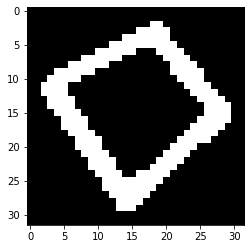

In [54]:
plt.imshow(imgs_norm[10000].squeeze() * std + mean, "gray")

In [17]:
gray_imgs_sorted = imgs.squeeze()
gray_imgs_sorted.shape

torch.Size([40000, 32, 32])

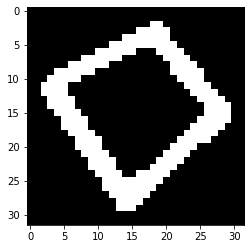

In [18]:
plt.imshow(gray_imgs_sorted[10000], "gray")
plt.show()

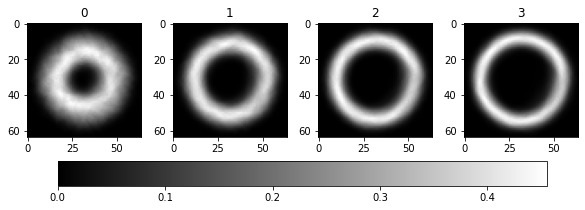

In [29]:
from my_utils.vis import Vis_mean
Vis_mean(dataset_dir='/home/wangyh/01-Projects/03-my/Datasets/polygons_unfilled_64_2',
         dataset_type='test')

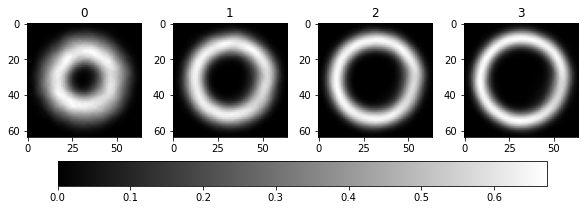

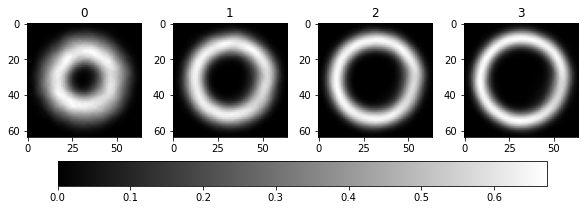

In [31]:
Vis_mean(dataset_dir='/home/wangyh/01-Projects/03-my/Datasets/polygons_unfilled_64_3',
         dataset_type='test')
Vis_mean(dataset_dir='/home/wangyh/01-Projects/03-my/Datasets/polygons_unfilled_64_4',
         dataset_type='test')

In [3]:
import numpy as np

array([0.9687124 , 0.72932094])

In [27]:
np.random.seed(1026)
np.sum(np.random.randn(10000) > 2)

233

error: OpenCV(4.5.5) /io/opencv/modules/imgproc/src/drawing.cpp:2428: error: (-215:Assertion failed) p.checkVector(2, CV_32S) >= 0 in function 'polylines'
